<a href="https://colab.research.google.com/github/omkarpadir14/Data_Analytics/blob/main/DA_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/climate_change.csv")
df.rename(columns={'CFC-12':'CFC_12', 'CFC-11': 'CFC_11'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC_11    308 non-null    float64
 7   CFC_12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [ ]:
df.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC_11      0
CFC_12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [ ]:
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


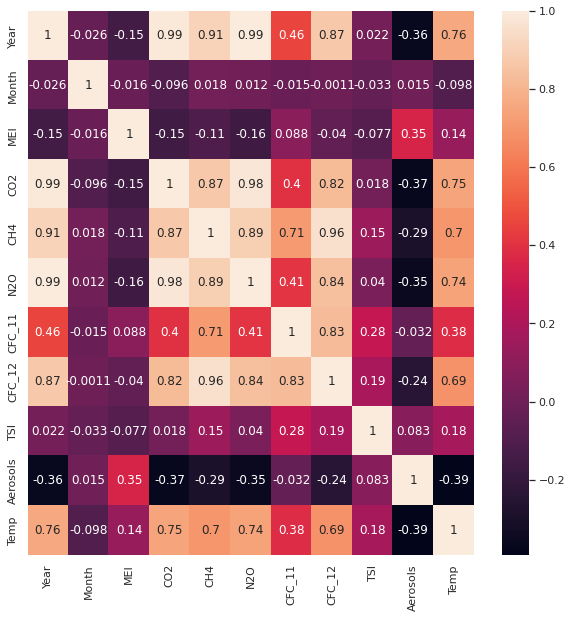

In [ ]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df.corr(), annot=True)

In [ ]:
fig = px.bar(df, x="Month", y="MEI", hover_data=['Year'])
fig.show()

In [ ]:
display(df)
df1 = df.drop('Month', axis=1)
df1 = df1.sort_values('Year')
display(df1)

,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


,Year,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,1983,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...
297,2008,-1.402,385.73,1803.45,321.345,245.898,536.484,1365.7366,0.0036,0.198
296,2008,-1.011,385.44,1809.92,321.328,246.183,536.876,1365.7163,0.0038,0.074
306,2008,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
300,2008,-0.355,388.50,1796.43,321.420,244.914,535.399,1365.7175,0.0031,0.283


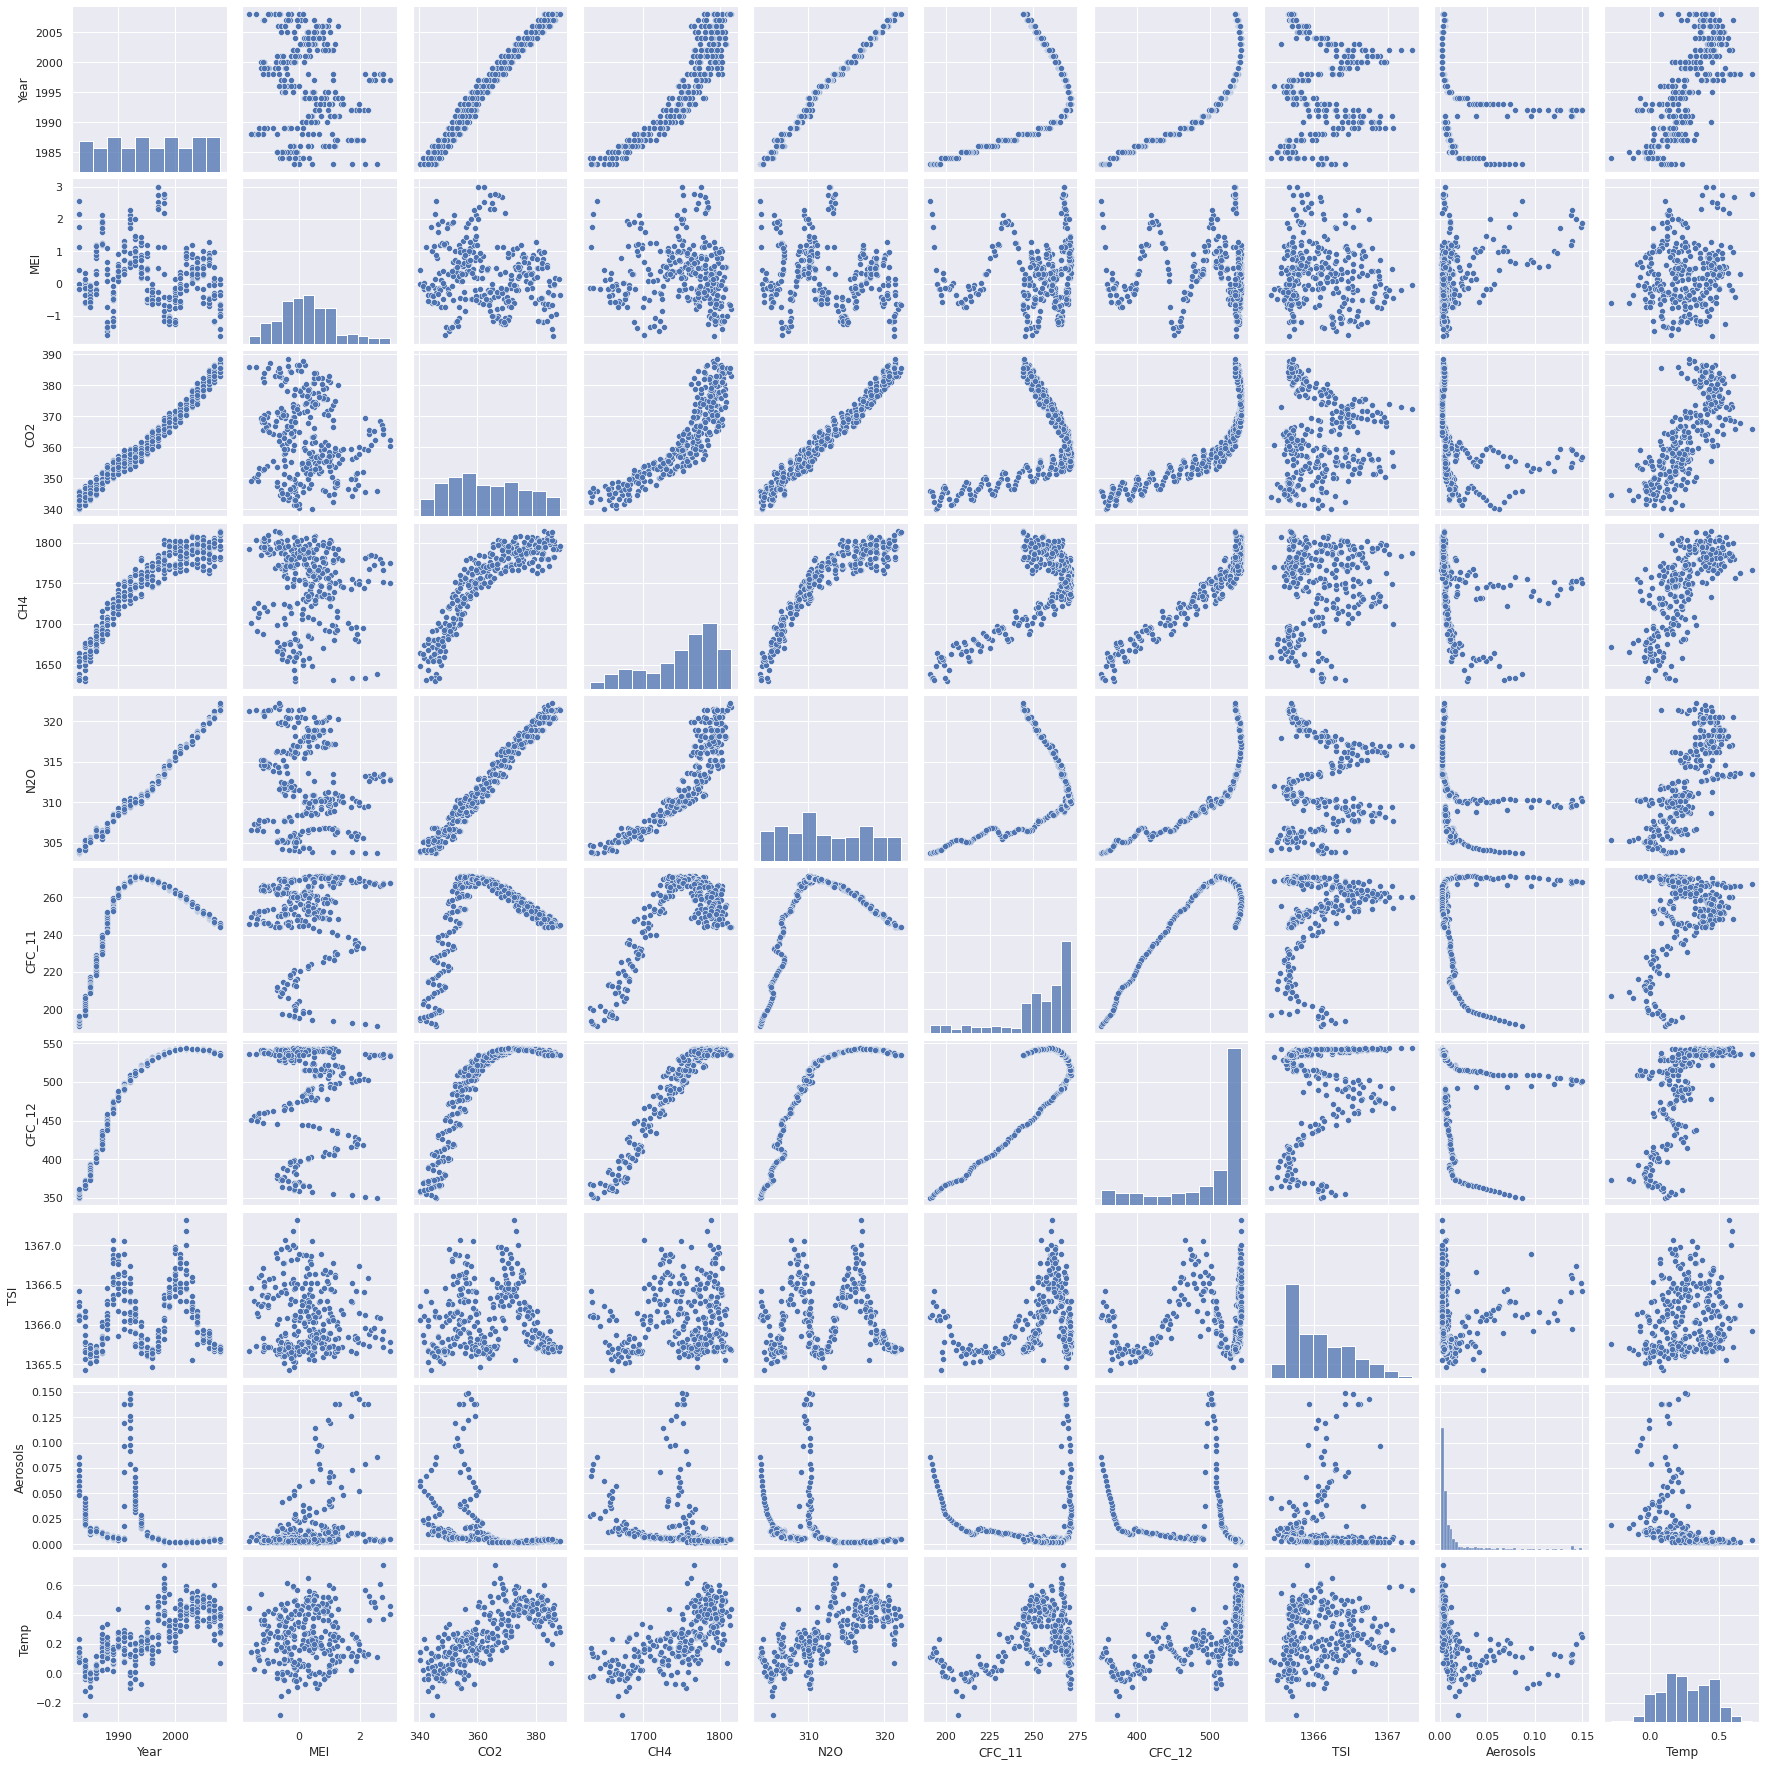

In [ ]:
sns.pairplot(df1)

In [ ]:
fig = px.bar(df1, x='Year', y='Temp')
fig.show()

In [ ]:
fig = px.box(df1, x='CFC_11')
fig.show()

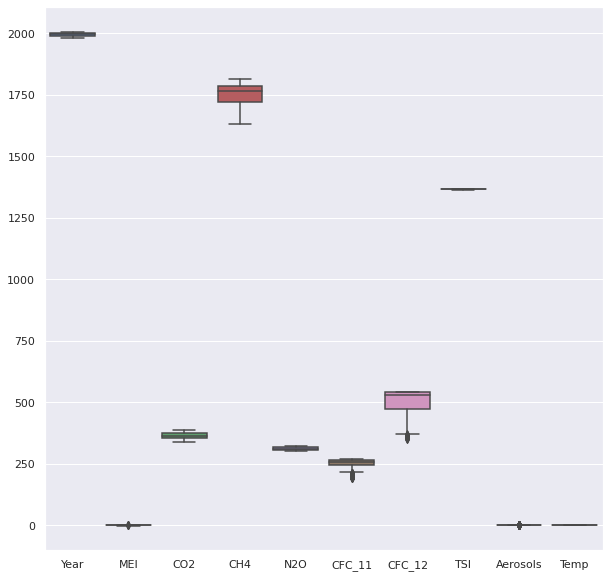

In [ ]:
sns.boxplot(data=df1)

In [ ]:
from scipy import stats
display(df1)
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
display(df1)

,Year,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,1983,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...
297,2008,-1.402,385.73,1803.45,321.345,245.898,536.484,1365.7366,0.0036,0.198
296,2008,-1.011,385.44,1809.92,321.328,246.183,536.876,1365.7163,0.0038,0.074
306,2008,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
300,2008,-0.355,388.50,1796.43,321.420,244.914,535.399,1365.7175,0.0031,0.283


,Year,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
1,1983,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
...,...,...,...,...,...,...,...,...,...,...
297,2008,-1.402,385.73,1803.45,321.345,245.898,536.484,1365.7366,0.0036,0.198
296,2008,-1.011,385.44,1809.92,321.328,246.183,536.876,1365.7163,0.0038,0.074
306,2008,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
300,2008,-0.355,388.50,1796.43,321.420,244.914,535.399,1365.7175,0.0031,0.283


In [ ]:
fig = px.box(df1, x='CFC_12')
fig.show()

In [ ]:
fig = px.box(df1, x='Temp')
fig.show()

In [ ]:
df1 = df1.drop(columns=['N2O'], axis=1)

As N2O and CO2 have same distribution, dropping N2O

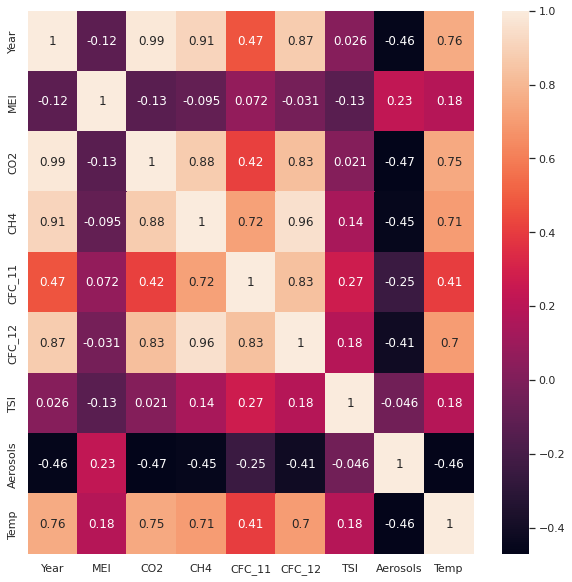

In [ ]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df1.corr(), annot=True)

In [ ]:
df1.to_csv("/content/drive/MyDrive/Colab Notebooks/mod_climate_change.csv")

Global hypothesis:<br>
H0: β1 = β2 = β3 = β4 = β5 = 0<br>
Ha: β1 ≠ β2 ≠ β3 ≠ β4 ≠ β5 ≠ 0<br>
Hypothesis for individual parameters:<br>
H0: βi = 0<br>
Ha: βi ≠ 0<br>
To check my assumptions, I used SAS software which readily provided the statistical data I needed. I used the method of forward elimination for selection of variables for my multivariate linear regression model. α value was 5% i.e. 0.05.
1) As the forward elimination methodology demands I entered the variables in decreasing order of their correlation values. On entering the Year variable which had correlation value of 0.76, I got the R2 value as 0.5711. Here, F0.95(1, 291) = 3.87 which is far lesser that obtained F-value of 407.5. Hence, I rejected the null hypothesis. As it is rejected, we are sure that β ≠ 0.<br>
2) Then I entered variable CO2. On entering the CO2 column which had correlation value of 0.75, I got R2 value as 0.5716. Here, F0.95(2, 290) = 3.025 which is far lesser that obtained F-value of 203.5. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for the variable CO2, p-values is more than α value of 0.05. Hence, we accept the individual hypothesis. Dropping CO2<br>
3) Then I entered variable CH4. On entering the CH4 column which had correlation value of 0.71, I got R2 value as 0.5719. Here, F0.95(2, 290) = 3.025 which is far lesser that obtained F-value of 203.73. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for both the variables, p-values are less than α value of 0.05. Hence, we accept the individual hypothesis.<br>
4) Then I entered variable CFC_12. On entering the CFC_12 column which had correlation value of 0.7, I got R2 value as 0.5809. Here, F0.95(3, 289) = 2.63 which is far lesser that obtained F-value of 133.5. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for all the variables, p-values are less than α value of 0.05. Hence, we accept the individual hypothesis.<br>
5) Then I entered variable Aerosols. On entering the Aerosols column which had correlation value of -0.46, I got R2 value as 0.5995. Here, F0.95(4, 288) = 2.4 which is far lesser that obtained F-value of 107.79. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for the CH4 variable, p-value is more than α value of 0.05. Hence, we reject the individual hypothesis. Dropping CH4<br>
6) Then I entered variable CFC_11. On entering the CFC_11 column which had correlation value of 0.41, I got R2 value as 0.6192. Here, F0.95(4, 288) = 2.4 which is far lesser that obtained F-value of 117.06. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for all the variables, p-values are less than α value of 0.05. Hence, we accept the individual hypothesis.<br>
7) Then I entered variable MEI. On entering the MEI column which had correlation value of 0.18, I got R2 value as 0.7077. Here, F0.95(5, 287) = 2.24 which is far lesser that obtained F-value of 138.96. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for the Year variable, p-value is more than α value of 0.05. Hence, we reject the individual hypothesis. Dropping Year<br>
8) Then I entered variable TSI. On entering the TSI column which had correlation value of 0.18, I got R2 value as 0.7379. Here, F0.95(5, 287) = 2.24 which is far lesser that obtained F-value of 161.61. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for all the variables, p-values are less than α value of 0.05. Hence, we accept the individual hypothesis. <br>

In [ ]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

In [ ]:
variables = ['CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1[variables], df1['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)

,CFC_12,Aerosols,CFC_11,MEI,TSI
231,542.882,0.0021,258.399,0.922,1366.3053
238,543.149,0.0026,256.985,0.819,1366.1968
247,543.199,0.0027,255.522,0.315,1366.2899
71,462.960,0.0060,253.623,-0.842,1366.5902
23,377.635,0.0138,211.111,-0.484,1365.5120
...,...,...,...,...,...
208,541.898,0.0021,262.365,-0.247,1366.5276
78,474.245,0.0055,258.730,-0.066,1366.8248
122,513.309,0.0445,270.460,1.090,1366.0917
293,537.380,0.0041,246.189,-1.142,1365.7388


In [ ]:
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [ 0.00355657 -2.26505733 -0.00600911  0.06157488  0.07658244]
Intercept:  -104.600041015014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [ ]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))

 The Score Linear Regression  0.7455475436593422


Conclusion:<br>
Problem 1.2 From the analysis of the results obtained from tests performed in SAS software, I came to know that the variables 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' are significant in the model i.e. their p-value is below 0.05. <br>

Problem 2.1
All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. To verify this, I tried removing/adding some of the variables and observed different values of coefficient indicating its dependence on values of coefficient of other variables.
The variables CO2, CH4, CFC_12 and Temp are having high correlation with N20 (absolute correlation greater than 0.7)
The variables CH4, CFC_12 are having high correlation with CFC_11 (absolute correlation greater than 0.7)

Problem 3
The coefficient of N2O in this reduced model is 0.02399865.
The r2 value obtained by this model is 0.6338 which is quiet low. Also, the previous model had no N2O variable as its independent variable.
  
